## Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [2]:
data = pd.read_csv('global_heat_index.csv')

In [5]:
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


<font color = 'red'> here we can see that before 7 solar radiation is 0 ( as it is night) and after 18 (6pm) again SR is 0 as the sun sets<br><b> so this data is not at all needed so we will clean it


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


## <font color ='blue'> Cleaning Data

cleaning before 6 AM and after 6 PM data

In [7]:
clean1 = data[data['Hour'] < 6]
clean2 = data[data['Hour'] > 18]

In [8]:
#now we can drop this both from the main 'data'

data = data.drop(clean1.index , axis = 0)
data = data.drop(clean2.index , axis = 0)

In [9]:
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
11,2011,1,1,11,2,21.354047,987.463867,29.157015,12.976929,0.980117,649
12,2011,1,1,12,2,22.161257,986.386169,27.593071,4.777779,1.411915,698
13,2011,1,1,13,2,22.256216,985.736511,27.274695,5.355347,1.747909,675
14,2011,1,1,14,2,21.725884,985.521545,27.819289,6.877182,2.005287,582
15,2011,1,1,15,2,20.507269,985.279663,30.023284,10.448921,2.206879,430


<font color = 'red'> kept 6 and 7 hours so that if there is radiation in case we wont miss out

## Input and Output

In [19]:
x = data.iloc[:,4:10].values
y = data.iloc[:,10].values
y = y.reshape(-1,1)

## Splitting Data

In [22]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.2, random_state=0)

In [23]:
xtrain

array([[ 23.        ,  28.95276574, 974.4337769 ,  72.00650744,
        230.5746765 ,   3.48527336],
       [  7.        ,  31.45725588, 982.7936401 ,  21.82772614,
         43.92575455,   1.79098237],
       [  5.        ,  45.90862693, 977.0198364 ,   9.19367135,
        256.100769  ,   2.31313491],
       ...,
       [  1.        ,  17.1015701 , 988.6531982 ,  34.68437781,
          9.09429932,   1.42941236],
       [ 24.        ,  25.72412262, 975.875     ,  95.01792758,
        211.7336121 ,   2.95700026],
       [ 25.        ,  28.49819406, 974.4430542 ,  83.5370614 ,
        239.0466156 ,   2.56590128]])

In [24]:
ytrain

array([[178],
       [602],
       [830],
       ...,
       [231],
       [162],
       [384]], dtype=int64)

## Standardizing DATA (Scaling Data)

In [ ]:
#now we can also scale our data

In [25]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.fit(xtest)

sc_y = StandardScaler()
ytrain = sc_y.fit_transform(ytrain)

In [26]:
xtrain

array([[ 1.05968611, -0.10596836, -0.86953246,  1.20221031,  0.39135863,
         0.85990992],
       [-0.37392147,  0.19583916,  0.47710333, -0.76144896, -1.50792046,
        -0.50344039],
       [-0.55312242,  1.93732438, -0.45296102, -1.2558607 ,  0.65110389,
        -0.08327831],
       ...,
       [-0.91152432, -1.53411535,  1.4209813 , -0.25832627, -1.86235409,
        -0.79438603],
       [ 1.14928659, -0.49504108, -0.63737524,  2.10272218,  0.19963805,
         0.43482279],
       [ 1.23888706, -0.16074724, -0.86803804,  1.65343846,  0.47756634,
         0.12011598]])

In [27]:
ytrain

array([[-0.83425739],
       [ 0.55048309],
       [ 1.29510768],
       ...,
       [-0.66116483],
       [-0.88651175],
       [-0.16148254]])

# K-Means With 6 Cluster

<font color= 'red'> Not using Solar Radiation Column as we are preparing clusters which is sutable for data 

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6,random_state=6)
kmeans = kmeans.fit(xtrain)

In [30]:
labels = kmeans.labels_
labels

array([0, 1, 5, ..., 4, 0, 0])

In [32]:
cluster_center= kmeans.cluster_centers_
cluster_center

array([[ 1.18786954,  0.07074471, -0.93531354,  1.2744532 ,  0.25370778,
        -0.09292937],
       [-0.6124862 , -0.22394598,  0.84782065, -0.57299925, -1.34972037,
        -0.7010868 ],
       [ 0.40067778,  1.05329674, -1.07504556, -0.40962583,  0.51084975,
         1.49352484],
       [ 0.16385485, -0.37523857,  0.64926045,  0.20834644,  0.68526716,
        -0.79658207],
       [-0.64980133, -1.63826276,  1.18392771,  0.25599522, -1.09391367,
        -0.03159278],
       [-1.06754648,  0.6824429 ,  0.0507027 , -1.16294114,  0.83448041,
         0.01032115]])

<font color= 'red'> here we can see we have 6 features but we cant plot and visualize this so to do so we will convert it to 2-D

# <font color ='green' > Applying PCA - Dimensional Reduction

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(xtrain)
pca = pca.transform(xtrain)

In [34]:
pca

array([[-1.59837425, -1.04649685],
       [ 1.2422458 ,  0.2751212 ],
       [-0.79398024,  2.07624203],
       ...,
       [ 2.88500539, -0.70662158],
       [-1.31961631, -2.03068811],
       [-1.55187659, -1.6325982 ]])

# Visualizing

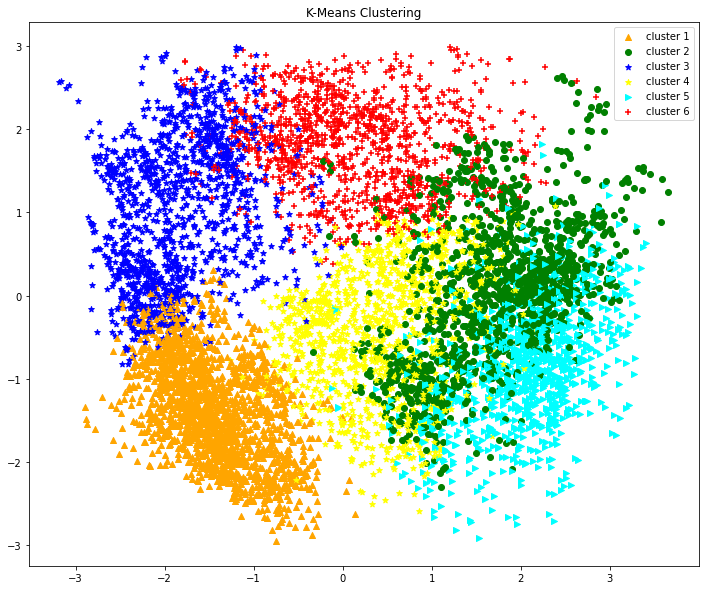

In [39]:
for i in range(0,pca.shape[0]):
    if kmeans.labels_[i] == 0:
        c1_6 = plt.scatter(pca[i,0], pca[i,1], c = 'orange', marker = '^')
        
    elif kmeans.labels_[i] == 1:
        c2_6 = plt.scatter(pca[i,0], pca[i,1], c = 'g', marker = 'o')
    
    elif kmeans.labels_[i] == 2:
        c3_6 = plt.scatter(pca[i,0], pca[i,1], c = 'b', marker = '*')
    
    elif kmeans.labels_[i] == 3:
        c4_6 = plt.scatter(pca[i,0], pca[i,1], c = 'yellow', marker = '*')
        
    elif kmeans.labels_[i] == 4:
        c5_6 = plt.scatter(pca[i,0], pca[i,1], c = 'cyan', marker = '>')
    
    elif kmeans.labels_[i] == 5:
        c6_6 = plt.scatter(pca[i,0], pca[i,1], c = 'red', marker = '+')

plt.rcParams['figure.figsize'] = (22,20)
plt.legend([c1_6, c2_6, c3_6, c4_6, c5_6, c6_6,], ['cluster 1', 'cluster 2',
                                                   'cluster 3', 'cluster 4',
                                                   'cluster 5', 'cluster 6'])
plt.title('K-Means Clustering')
plt.show()